In [159]:
#import packages to use in the program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [170]:
"""
   Here I have written a function 
   that takes in the file name as an arguement, 

   then returns two data frames as described in the question
   
   
   I also added another arguement *skip*, 
   so that dataframe starts from where 
   the data starts from, skipping the headings
"""
df_world_bank = {}
#constant has their variable name in capital(PEP8)
DIR_FILENAME = "API_19_DS2_en_csv_v2_3931355.csv"
YEARS_IN_ROWS =['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969'
                ,'1970','1971','1972','1973','1974','1975','1976','1977','1978','1979'
                ,'1980','1981','1982','1983','1984','1985','1986','1987','1988','1989'
                ,'1990','1991','1992','1993','1994','1995','1996','1997','1998','1999'
                ,'2000','2001','2002','2003','2004','2005','2006','2007','2008','2009'
                ,'2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'
                ,'2020']
def read_file(filename, skip=0):
    
    #read the data into data frame
    df_world_bank = pd.read_csv(filename, skiprows=skip)
    
    #return the data starting from year column as a separate data frame, then the countries as a second data frame
    return df_world_bank.iloc[:,4:-1], df_world_bank["Country Name"]


In [172]:
#calling the declared function and passing the file name
df_years, df_countries = read_file(DIR_FILENAME, 4)

In [7]:
df_world_bank = pd.read_csv(dir_filename, skiprows=4)

In [65]:
# Mapping of country codes to their actual names
#Countries_Choosen_Map = {

#    "USA": "United States",

#    "IND":"India",

#    "CHN": "China",

#    "JPN": "Japan",

#    "CAN": "Canada",

#    "GBR": "United Kingdom",

#    "ZAF": "South Africa"

#}

Countries_Choosen=['United States', 'India', 'China', 'Japan', 'Canada', 'United Kingdom', 'South Africa']



#Indicator_Choosen_Map={

#    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",

#    "NV.AGR.TOTL.ZS":"Agriculture, forestry, and fishing, value added (% of GDP)",

#    "SP.URB.TOTL": "Urban population",

#    "EN.ATM.CO2E.SF.KT": "CO2 emissions from solid fuel consumption (kt)",

#    "EG.ELC.NGAS.ZS": "Electricity production from natural gas sources (% of total)"

#}


Indicator_Codes_Choosen=['EG.USE.ELEC.KH.PC', 'NV.AGR.TOTL.ZS', 'SP.URB.TOTL','EN.ATM.CO2E.SF.KT','EG.ELC.NGAS.ZS']

In [132]:
#Fetching data for each country using few indicators
def retrive_data_by_Country(df_world_bank, country_name):
    df_country =  df_world_bank[df_world_bank['Country Name']==country_name]

    df_country = df_country[df_country['Indicator Code'].isin(Indicator_Codes_Choosen)]

    columns_to_pick = ['Indicator Name'] + years_in_row

    df_country = df_country[columns_to_pick].T
    df_country.iloc[0].Name = 'Year'

    df_country.columns = df_country.iloc[0]
    
    df_country = df_country.iloc[1:,:]
    
    df_country.rename(columns = {'Indicator Name':'Year'}, inplace = False)
    
    df_country['Year'] = df_country.index
    
    df_country["Country Name"] = country_name
    
    return df_country

In [133]:
#picking for country United States

united_states = retrive_data_by_Country(df_world_bank, 'United States')

india = retrive_data_by_Country(df_world_bank, 'India')

china = retrive_data_by_Country(df_world_bank, 'China')

japan = retrive_data_by_Country(df_world_bank, 'Japan')

canada = retrive_data_by_Country(df_world_bank, 'Canada')

uk = retrive_data_by_Country(df_world_bank, 'United Kingdom')

south_africa = retrive_data_by_Country(df_world_bank, 'South Africa')

canada

Indicator Name,Urban population,"Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions from solid fuel consumption (kt),Electric power consumption (kWh per capita),Electricity production from natural gas sources (% of total),Year,Country Name
1960,12368141.0,NaN,49676.849,5630.629813,3.504475,1960,Canada
1961,12729040.0,NaN,45632.148,5605.111926,3.726961,1961,Canada
1962,13121753.0,NaN,47069.612,5791.12496,3.681449,1962,Canada
1963,13522659.0,NaN,46636.906,5966.04092,3.546037,1963,Canada
1964,13934678.0,NaN,51961.39,6468.926261,3.170909,1964,Canada
...,...,...,...,...,...,...,...
2016,29357013.0,1.862226,65862.987,NaN,NaN,2016,Canada
2017,29729597.0,1.889995,NaN,NaN,NaN,2017,Canada
2018,30175132.0,1.699892,NaN,NaN,NaN,2018,Canada
2019,30631841.0,NaN,NaN,NaN,NaN,2019,Canada


In [161]:
# Function to fill the remaining missing values with average values for columns

def fill_missing_values(df):
    
    # create a copy
    df_cp=df.copy()
    
    # get the list of columns in the dataframe
    cols_list=list(df_cp.columns)
    
    # exclude the last column - Country Name
    # This column was added explicitly when the data was loaded, hence, it does not contain any missing values.
    # Also, fillna function does not work on categorical features since it performs an aggregation.
    cols_list.pop()
    
    # replace all None values with NaN, fillna only works on nans
    df_cp.fillna(value=pd.np.nan, inplace=True)
    
    # replace all NaN values with the mean of the column values
    for col in cols_list:
        df_cp[col].fillna((df_cp[col].mean()), inplace=True)
    return df_cp

In [162]:

united_states = fill_missing_values(united_states)

india = fill_missing_values(india)

china = fill_missing_values(china)

japan = fill_missing_values(japan)

canada = fill_missing_values(canada)

uk = fill_missing_values(uk)

south_africa = fill_missing_values(south_africa)

# store all the DataFrames in a list to iteratively apply pre-processing steps

list_of_countries=[united_states.copy(), india.copy(), china.copy(), japan.copy(), canada.copy(), uk.copy(), south_africa.copy()]

In [149]:
df_all_countries = pd.concat(list_of_countries)
df_all_countries.head()

Indicator Name,Urban population,"Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions from solid fuel consumption (kt),Electric power consumption (kWh per capita),Electricity production from natural gas sources (% of total),Year,Country Name
1960,126462473.0,1.099231,918715.512,4049.786629,21.140983,1960,United States
1961,129276215.0,1.099231,888169.402,4182.175501,21.521539,1961,United States
1962,131988693.0,1.099231,921572.105,4433.606021,21.777894,1962,United States
1963,134615404.0,1.099231,987816.460,4690.486256,22.244933,1963,United States
1964,137215986.0,1.099231,1050034.449,4970.446456,22.596072,1964,United States


In [177]:
#Descriptive Statistics
df_all_countries_copy=df_all_countries.drop(['Year', 'Country Name'], axis='columns')
df_all_countries_copy.describe()

Indicator Name,Urban population,"Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions from solid fuel consumption (kt),Electric power consumption (kWh per capita),Electricity production from natural gas sources (% of total)
count,4.270000e+02,427.000000,4.270000e+02,427.000000,427.000000
mean,1.418821e+08,8.629902,7.779266e+05,5650.232840,8.409490
std,1.597994e+08,11.965667,1.183995e+06,4796.396316,10.589728
min,7.971773e+06,0.545491,4.501243e+04,97.772718,0.000000
25%,3.030864e+07,1.099231,1.466763e+05,1080.455213,0.465806
50%,9.269648e+07,1.876399,3.021755e+05,4579.952732,3.681449
75%,1.889568e+08,11.325577,1.069228e+06,8268.053416,14.502159
max,8.667057e+08,42.767622,7.499587e+06,17264.736744,46.325546


In [175]:
#Correlation and non-correlation
df_all_countries_copy.corr()

Indicator Name,Urban population,"Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions from solid fuel consumption (kt),Electric power consumption (kWh per capita),Electricity production from natural gas sources (% of total)
Indicator Name,,,,,
Urban population,1.000000,0.272930,0.831502,-0.312609,-0.040557
"Agriculture, forestry, and fishing, value added (% of GDP)",0.272930,1.000000,0.054639,-0.618609,-0.351820
CO2 emissions from solid fuel consumption (kt),0.831502,0.054639,1.000000,-0.099636,-0.045607
Electric power consumption (kWh per capita),-0.312609,-0.618609,-0.099636,1.000000,0.310482
Electricity production from natural gas sources (% of total),-0.040557,-0.351820,-0.045607,0.310482,1.000000


In [176]:
df_all_countries_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 1960 to 2020
Data columns (total 5 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Urban population                                              427 non-null    float64
 1   Agriculture, forestry, and fishing, value added (% of GDP)    427 non-null    float64
 2   CO2 emissions from solid fuel consumption (kt)                427 non-null    float64
 3   Electric power consumption (kWh per capita)                   427 non-null    float64
 4   Electricity production from natural gas sources (% of total)  427 non-null    float64
dtypes: float64(5)
memory usage: 20.0+ KB


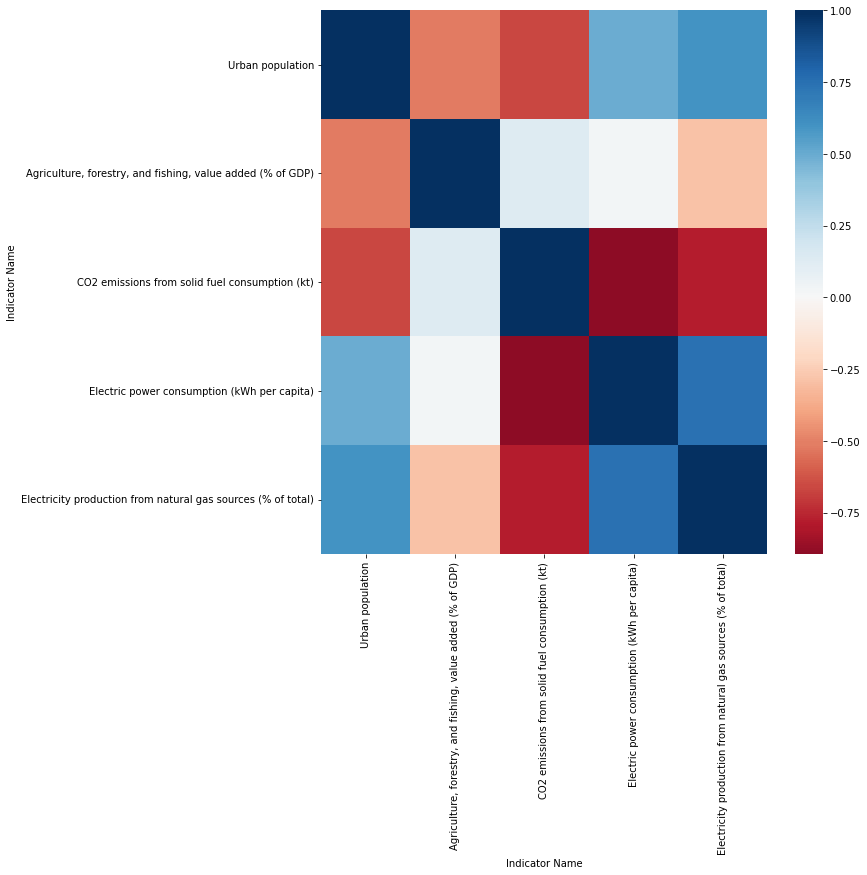

In [165]:
#Correlation Matrix
# create a copy
df_cleaned_us_copy=uk.copy()
# Exclude the categorical features from the matrix
df_cleaned_us_copy.drop(['Year', 'Country Name'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_cleaned_us_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.savefig('correlation_us.png')
plt.show()

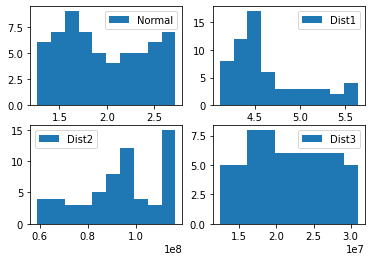

In [169]:
plt.figure()
plt.subplot(2,2,1)
plt.hist(united_states["Urban population"], label="Normal")
plt.legend()

plt.subplot(2,2,2)
plt.hist(uk["Urban population"], label="Dist1")
plt.legend()

plt.subplot(2,2,3)
plt.hist(japan["Urban population"], label="Dist2")
plt.legend()

plt.subplot(2,2,4)
plt.hist(canada["Urban population"], label="Dist3")
plt.legend()

plt.show()

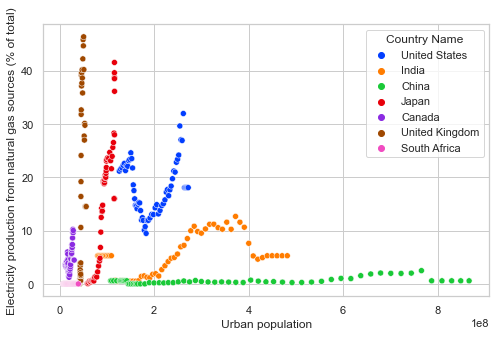

In [182]:
# Plotting scatter plot to check correllation
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax=sns.scatterplot(x='Urban population', y='Electricity production from natural gas sources (% of total)', hue='Country Name', palette="bright", data=df_all_countries)

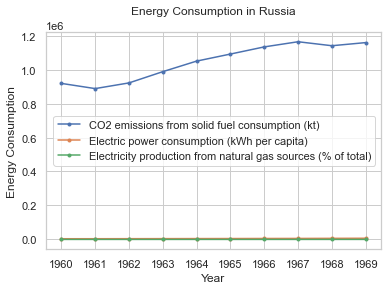

In [187]:
# Pick the columns Year, and 3 different power consumptions from the dataframe for russia
plt.plot(united_states.head(10)['Year'],united_states.head(10)['CO2 emissions from solid fuel consumption (kt)'],'.-')
plt.plot(united_states.head(10)['Year'],united_states.head(10)['Electric power consumption (kWh per capita)'],'.-')
plt.plot(united_states.head(10)['Year'],united_states.head(10)['Electricity production from natural gas sources (% of total)'],'.-')

plt.legend(['CO2 emissions from solid fuel consumption (kt)', 'Electric power consumption (kWh per capita)', 'Electricity production from natural gas sources (% of total)'], loc='best')
plt.title("Energy Consumption in Russia\n")
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.show()